In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
d = pd.read_csv('dirty_data.csv')
d

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-08-07,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776,59.70,-37.817662,144.970405,10,20174.70,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,03-28-2019,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


Chequeo de valores nulos en las columnas

In [3]:
d.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           1
is_happy_customer                0
dtype: int64

Conteo de almacenes

In [6]:
warehouses = d['nearest_warehouse'].unique()
warehouses

array(['Thompson', 'Nickolson', 'Bakers'], dtype=object)

Le cambio la inicial por mayúscula a los que iniciaban con minúscula

In [19]:
d['nearest_warehouse'] = d['nearest_warehouse'].str.upper()


In [7]:
c_warehouses = d['nearest_warehouse'].value_counts()
c_warehouses

nearest_warehouse
Thompson     197
Nickolson    184
Bakers       119
Name: count, dtype: int64

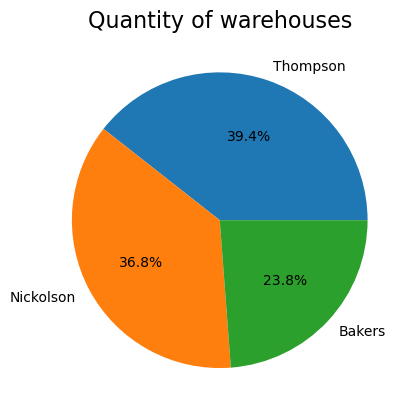

In [8]:
plt.pie(c_warehouses,
        labels=(['Thompson','Nickolson','Bakers']),
        autopct="%0.1f%%")
plt.title('Quantity of warehouses', size=16)
plt.show()

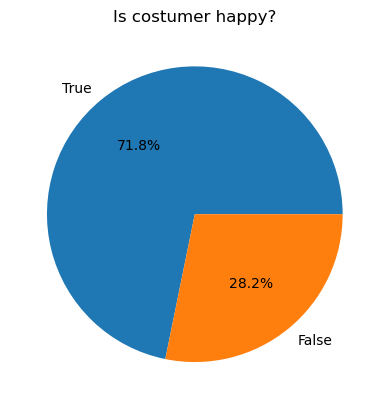

In [10]:
review = d['is_happy_customer'].value_counts()
plt.pie(review,
        labels=(['True','False']),
        autopct="%0.1f%%")
plt.title('Is costumer happy?')
plt.show()

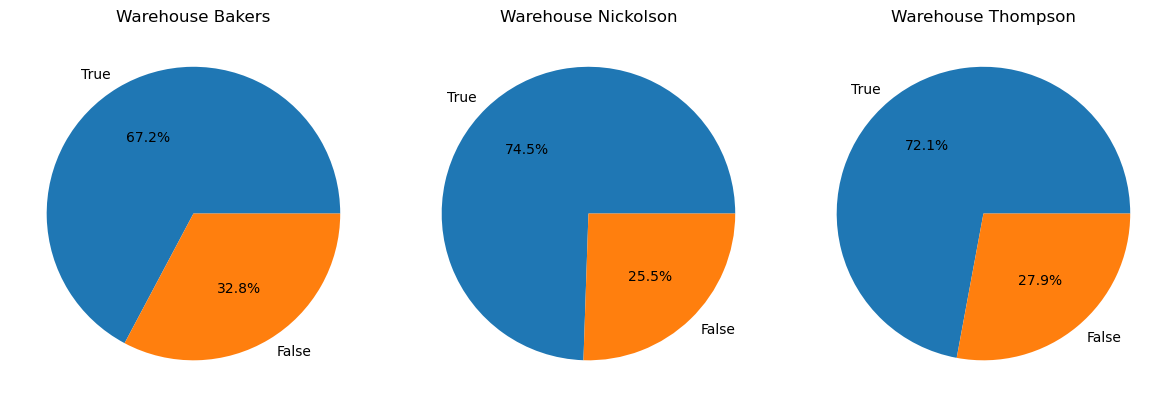

In [ ]:
# Crea gráficos separados
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila, 3 columnas

for ax, (warehouse, group) in zip(axes, d.groupby('nearest_warehouse')):
    count_review = group['is_happy_customer'].value_counts()
    
    ax.pie(count_review, labels=count_review.index, autopct="%0.1f%%")
    ax.set_title(f'Warehouse {warehouse}')
    
plt.tight_layout()
plt.show()